In [11]:
import numpy as np 
import matplotlib.pyplot as plt 
from sparse_rf.algs import *
from sparse_rf.modules import make_X, make_A, make_W
from sparse_rf.util import *
import sparse_rf.util.fns as fns 
import sparse_rf.util.polynomials as poly
from functools import partial
import random
import gc

import sys

In [12]:
def plot_results(results_l1, results_l2, prune_result, w_result, func_name, d):
    print("{}, l1: {}".format(func_name, [np.mean(res) for res in results_l1]))
    print("{}, l2: {}".format(func_name, [np.mean(res) for res in results_l2]))
    print("{}, l2_prune: {}".format(func_name, [np.mean(res) for res in prune_result]))
    plt.loglog(qs, [np.mean(res) for res in results_l1], '*-', label="l1")
    plt.loglog(qs, [np.mean(res) for res in results_l2], '.-', label="l2")
    plt.loglog(qs, [np.mean(res) for res in prune_result], 'o-', label="pruned l2")
    plt.title(f"{func_name}")
    plt.xlabel("q")
    plt.ylabel("test error")
    plt.legend()
    plt.savefig(f"./figs/d_{d}/{func_name}_d{d}_l1_l2_prune_test_error.png", bbox_inches="tight", dpi=200)
    plt.show()

    plt.loglog(qs, w_result, 'go--', label="l2")
    plt.ylabel("N_prune")
    plt.xlabel("q")
    plt.title(f"{func_name}")
    plt.savefig(f"./figs/d_{d}/{func_name}_d{d}_l2_prune_N.png", bbox_inches="tight", dpi=200)
    plt.show()

In [13]:
def get_double_descent_curve(X_train, X_test, y_train, y_test, w_length, qs, d, func_name):
    res_re = []
    for q in qs:
        print(q)
        res_reinit = reinit(X_train, X_test, y_train, y_test, d, q, min_l2, w_length)
        res_re.append(res_reinit)
    for i, q in enumerate(qs):
        plt.loglog(w_length, res_re[i], '-.', label="q={}, min={:.2e}".format(q, min(res_re[i])))
    plt.ylabel("test error")
    plt.xlabel("#features")
    plt.title(f"{func_name}")
    plt.legend()
    plt.savefig(f"./figs/d_{d}/{func_name}_d{d}_l2_dd.png", bbox_inches="tight", dpi=200)
    plt.show()

In [14]:
# set up parameters
m = 1000
d = 5
N = 10000
active = fourier

ratio_train = 0.7
qs = [1, 2, 3, 4, 5, 20, 100] if d == 100 else list(range(1, d+1)) 

r training with (58,)
mse after training with (46,)
mse after training with (36,)
mse after training with (28,)
mse after training with (22,)
Linesearch failed with error 1. Damping max BB scaling to 10000.0
Linesearch failed with error 1. Damping max BB scaling to 1000.0
Linesearch failed with error 1. Damping max BB scaling to 100.0
Linesearch failed with error 1. Damping max BB scaling to 10.0
Linesearch failed with error 1. Damping max BB scaling to 1.0
Linesearch failed with error 1. Damping max BB scaling to 0.1
Linesearch failed with error 1. Damping max BB scaling to 0.01
Linesearch failed with error 1. Damping max BB scaling to 0.001
Linesearch failed with error 1. Damping max BB scaling to 0.0001
mse after training with (16000,)
mse after training with (12800,)
mse after training with (10240,)
mse after training with (8192,)
mse after training with (6553,)
mse after training with (5242,)
mse after training with (4193,)
mse after training with (3354,)
mse after training with (

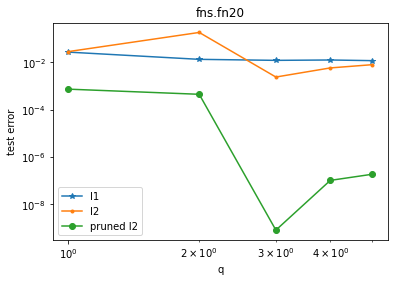

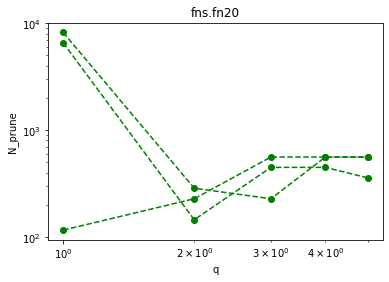

1
2
3
4
5


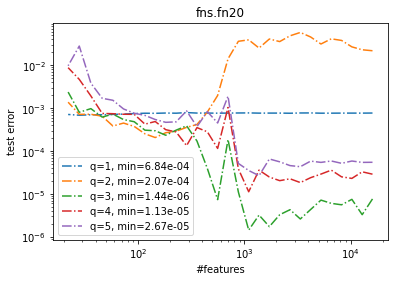

In [15]:
func_dict = {"fn": [fns.fn20], "name": ["fns.fn20"]}
for i in range(len(func_dict["fn"])):
    X_train, X_test, y_train, y_test, results_l1, results_l2, prune_result, w_result, w_length = test_perfomance(d, qs, N, m, func_dict["fn"][i], ratio_train, seeds=[13, 14, 15])
    plot_results(results_l1, results_l2, prune_result, w_result, func_dict["name"][i], d)
    get_double_descent_curve(X_train, X_test, y_train, y_test, w_length, qs, d, func_dict["name"][i])